## 과제 1
** 날짜 테이블 생성후 주말만 날짜 뽑아내서 데이터하고 매칭 시킨후 매칭되는 날짜에 holiday 변수를 1로 바꿔넣는 function 생성하고, temp,atemp,습도 변수 상관계수 확인한다음에 주성분분석 이용해서 변수 축소하는 function 생성하기 **


In [6]:
data = read.csv("C://Users//이명아//Desktop//R심화 스터디//1주차//train_cycle.csv")
head(data)

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
2011-01-01 5:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


In [7]:
#날짜 테이블 생성 후 주말 확인하기


#weekday 생성
data$weekday <- weekdays(as.Date(data$datetime))      #weekdays 이용시 요일 찾을 수 있음

# weekend열 생성

data$weekend=0
  
for(i in 1:nrow(data)){
  
  if((data$weekday[i]=="토요일"||data$weekday[i] =="일요일")){
    data[i,"weekend"]=1
  }else{
    data[i,"weekend"]=0
  }
   
  #holiday와 weekend 매칭
  
  if(data$weekend[i]==1){
    data[i,"holiday"]=1
  }
  
}

** PCA 돌려보기 **

datetime     season    holiday workingday    weather       temp      atemp 
         0          0          0          0          0          0          0 
  humidity  windspeed     casual registered      count    weekday    weekend 
         0          0          0          0          0          0          0

,temp,atemp,humidity,windspeed
temp,1.00000000,0.98494811,-0.06494877,-0.01785201
atemp,0.98494811,1.00000000,-0.04353571,-0.05747300
humidity,-0.06494877,-0.04353571,1.00000000,-0.31860699
windspeed,-0.01785201,-0.05747300,-0.31860699,1.00000000


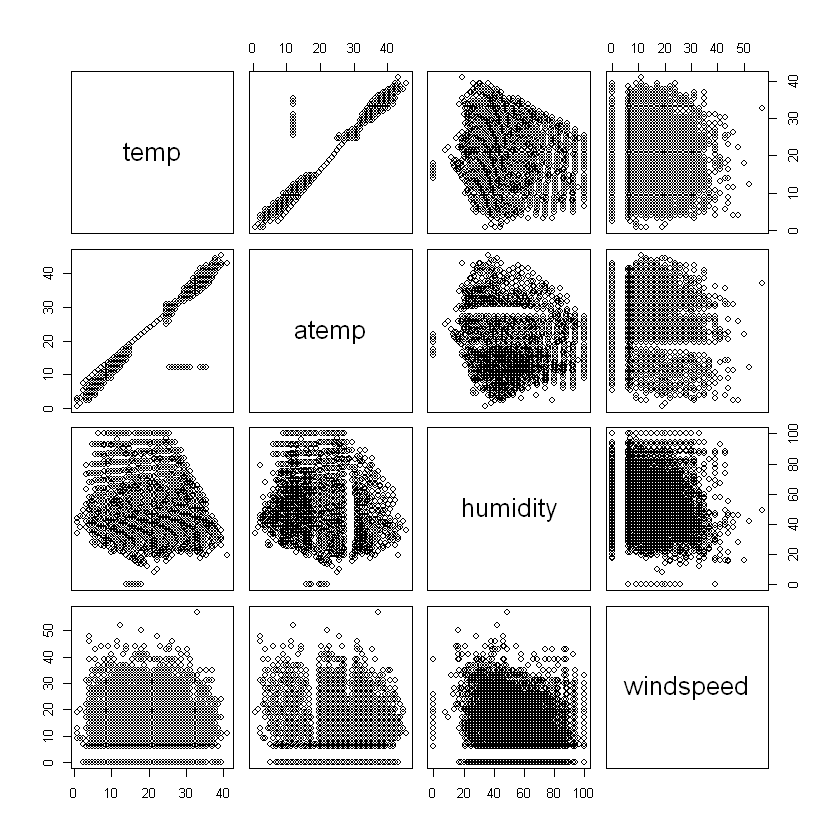

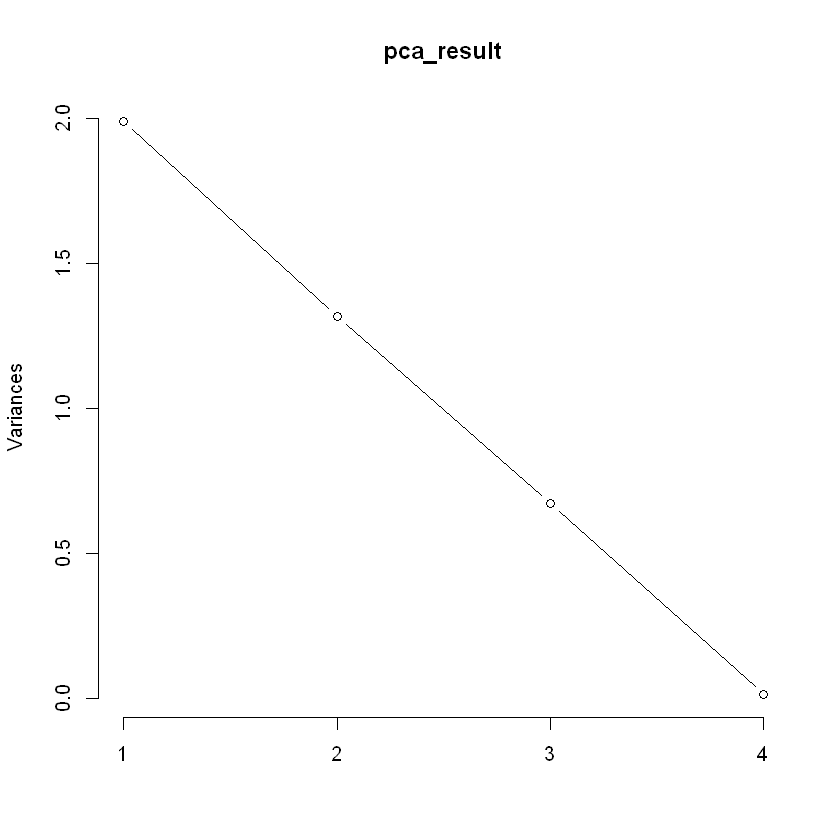

In [12]:
#na확인
colSums(is.na(data))

#산점도 확인
plot(data[,c("temp","atemp","humidity","windspeed")])  #temp와 atemp는 상관관계O, temp와 humidity/ atemp와 humidity는 상관관계 X로 보임

#상관계수 확인 (연속형 변수만)
cor(data[,c("temp","atemp","humidity","windspeed")])

#PCA 검정
pca_result = prcomp(data[,6:9], center = T, scale. = T)
plot(pca_result, type='l') #elbow point가 존재하지 않음..

In [15]:
summary(pca_result)

Importance of components:
                         PC1    PC2    PC3     PC4
Standard deviation     1.411 1.1484 0.8216 0.11922
Proportion of Variance 0.498 0.3297 0.1688 0.00355
Cumulative Proportion  0.498 0.8277 0.9964 1.00000

두번째 주성분까지만 이용해도 어느정도의 정확성을 보임

## 스터디를 통한 과제 보충
- function으로의 구현

# PCA 구현

Q. 다변량 자료의 상관계수 행렬을 입력하면, 이를 바탕으로 주성분 분석을 수행하는 PCA.using.CORR이라는 함수를 작성하여라. 단 princomp 등의 주성분 분석을 수행하는 R 내장함수나 패키지를 사용하지 말고 직접 코드를 작성할 것. 또한 주성분 분석의 결과는 주성분 별 분산이 1보다 큰 경우에 한하여, 1) 각 주성분 별 계수값 (PC.loading), 2) 각 주성분 별 분산(PC.variance), 3) 각 주성분과 원 변수들 간의 상관행렬(CORR.PC.and.X)이 아래와 같은 형식으로 출력되도록 할 것. (아래 사례는 주성분 분석 강의시간에 실습자료로 활용하였던 HSAUR 패키지의 heptathlon 자료를 적용했을 때의 예시 결과임)

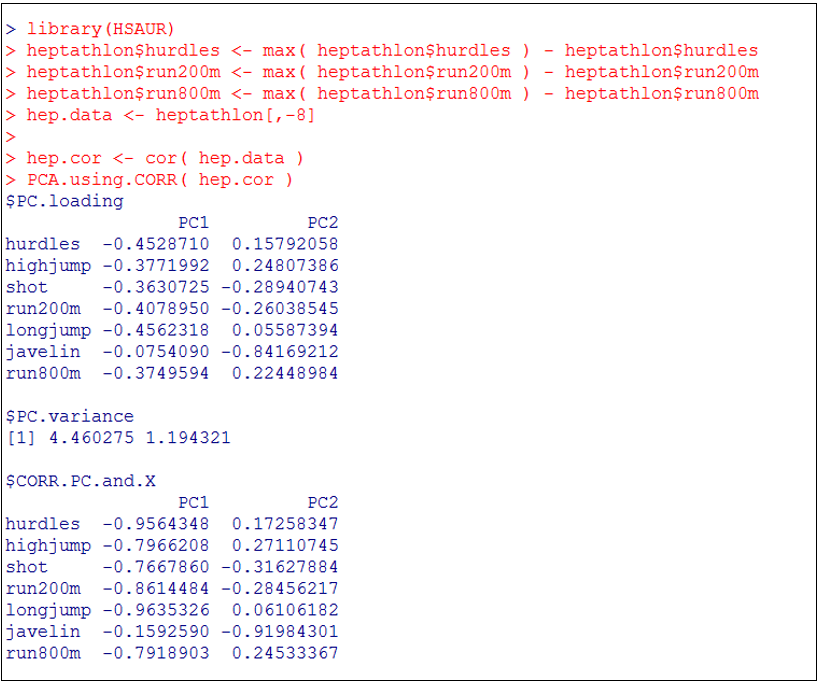

In [3]:
install.packages("HSAUR")

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"

package 'HSAUR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\Rtmpglm2D3\downloaded_packages


In [4]:
library(HSAUR)

Loading required package: tools


In [11]:
#setting
heptathlon$hurdles<-max(heptathlon$hurdles)-heptathlon$hurdles
heptathlon$run200m<-max(heptathlon$run200m)-heptathlon$run200m
heptathlon$run800m<-max(heptathlon$run800m)-heptathlon$run800m

hep.data <-heptathlon[,-8]
hep.cor <- cor(hep.data) ; hep.cor

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
hurdles,1.000000000,0.811402536,0.6513347,0.7737205,0.91213362,0.007762549,0.77925711
highjump,0.811402536,1.000000000,0.4407861,0.4876637,0.78244227,0.002153016,0.59116282
shot,0.651334688,0.440786140,1.0000000,0.6826704,0.74307300,0.268988837,0.41961957
run200m,0.773720543,0.487663685,0.6826704,1.0000000,0.81720530,0.333042722,0.61681006
longjump,0.912133617,0.782442273,0.7430730,0.8172053,1.00000000,0.067108409,0.69951116
javelin,0.007762549,0.002153016,0.2689888,0.3330427,0.06710841,1.000000000,-0.02004909
run800m,0.779257110,0.591162823,0.4196196,0.6168101,0.69951116,-0.020049088,1.00000000


#### 1) PC.loading

In [80]:
# PCA.using.corr(hep.cor) 을 하면 주성분 분석이 나오게

PCA.using.corr = function(data){
    
    # PC.loading
    eigenValue <- eigen(data)$values
    eigenVectors <- eigen(data)$vectors
    var <- as.vector(eigenValue[eigenValue>1]) 
    
    PC.loading <- as.matrix(eigenVector[,c(1:length(var))])
    rownames(PC.loading) <- c(rownames(data))
    colnames(PC.loading) <- c(paste("PC",c(1:length(var)),sep=""))
    
    # PC.variance
    PC.variance <- var
    
    ma <- list(PC.loading, PC.variance)
    return(ma)
    
}

PCA.using.corr(hep.cor)


,PC1,PC2
hurdles,-0.4528710,0.15792058
highjump,-0.3771992,0.24807386
shot,-0.3630725,-0.28940743
run200m,-0.4078950,-0.26038545
longjump,-0.4562318,0.05587394
javelin,-0.0754090,-0.84169212
run800m,-0.3749594,0.22448984


### * PCA 이론 공부 첨부

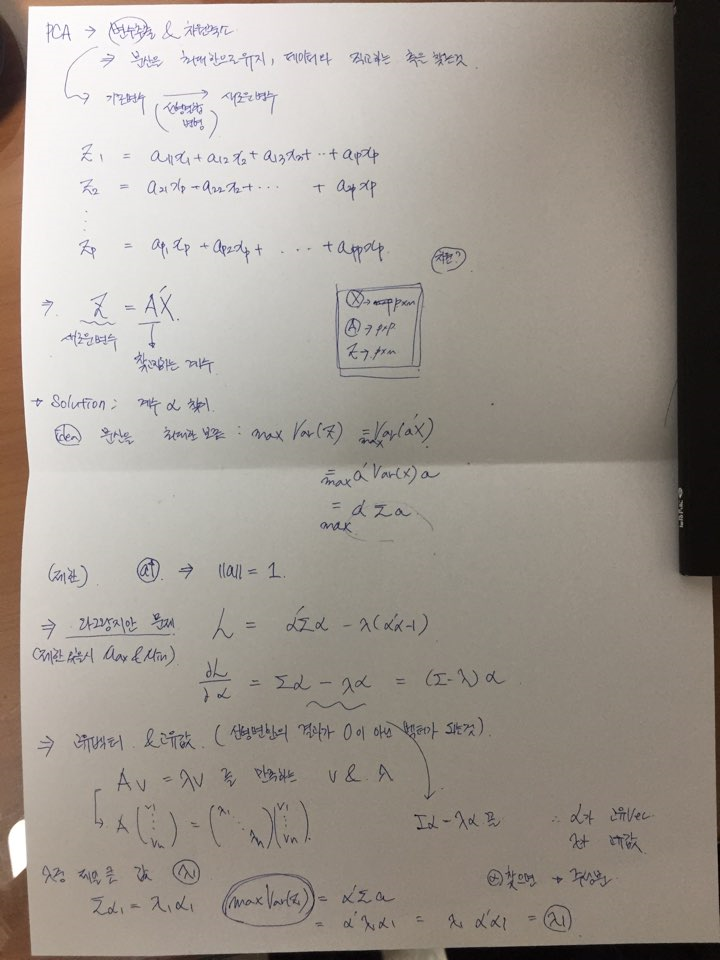